### PROJEK SENTIMENT ANALYSIS APLIKASI SHOPEE 

Nama anggota kelompok:
1. Andi Agustinus
2. Bayu Eka Salam
3. Rio Sanjaya
4. Zuhri

### 1. Proses Crawling data


In [ ]:
#Modul google-play-scraper digunakan untuk mengambil data aplikasi dari Google Play store

!pip install google-play-scraper

In [ ]:
#Melakukan import library

from google_play_scraper import app
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Kikis jumlah ulasan yang diinginkan

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id', #Jenis bahasa yang ingin digunakan
    country='id', #Pemilihan Negara
    sort=Sort.MOST_RELEVANT, #default ke Sortir. PALING RELEVAN Anda dapat menggunakan Sort. TERBARU untuk mendapatkan ulasan terbaru
    count=1000, #jumlah data yg di ambil 1000
    filter_score_with=None #default ke Tidak Ada (berarti semua skor) Gunakan 1 atau 2 atau 3 atau 4 atau 5 untuk memilih skor tertentu
)

In [ ]:
df_data = pd.DataFrame(np.array(result),columns=['review'])

df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))

df_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,de7adcca-8b7d-497d-bf7d-2af69460e855,Rusdi,https://play-lh.googleusercontent.com/a/AATXAJ...,baru buka langsung crash dan keluar aplikasi s...,1,865,2.88.23,2022-06-12 15:14:09,None,NaT
1,c907a88a-bd53-479a-9603-cf541cd4605a,Manan Permana,https://play-lh.googleusercontent.com/a-/AOh14...,Setelah diupdate ke versi terbaru malah ga bis...,1,3954,2.88.23,2022-06-09 08:00:17,None,NaT
2,575e9715-1452-4b30-8262-9d6d0ff8509a,Najla Atsilah,https://play-lh.googleusercontent.com/a/AATXAJ...,Performa aplikasi setiap update tidak ada peru...,2,5736,2.87.40,2022-06-07 11:33:50,None,NaT
3,997e75d5-faaf-48e2-a441-547b2467775a,xTROUBLEx,https://play-lh.googleusercontent.com/a-/AOh14...,Saya mengapresiasi aplikasi ini. Karena memuda...,1,2424,2.87.40,2022-06-05 09:00:05,None,NaT
4,3a701ad7-cb4b-48f7-b1aa-4100d0f75dfe,Rashya Bryan,https://play-lh.googleusercontent.com/a-/AOh14...,"Sudah sering belanja di Shopee, kebutuhan apap...",4,4211,2.87.40,2022-05-30 05:28:17,"Hi Kak, mohon maaf atas ketidaknyamanannya ya....",2022-05-30 07:25:29


In [ ]:
#Hitung jumlah data yang kita dapatkan

len(df_data.index)

1000

In [ ]:
#Pratinjau nama pengguna, peringkat, tanggal-waktu, dan ulasan saja

df_data[['at','score', 'content']].head()  

,at,score,content
0,2022-06-12 15:14:09,1,baru buka langsung crash dan keluar aplikasi s...
1,2022-06-09 08:00:17,1,Setelah diupdate ke versi terbaru malah ga bis...
2,2022-06-07 11:33:50,2,Performa aplikasi setiap update tidak ada peru...
3,2022-06-05 09:00:05,1,Saya mengapresiasi aplikasi ini. Karena memuda...
4,2022-05-30 05:28:17,4,"Sudah sering belanja di Shopee, kebutuhan apap..."


In [ ]:
#Jalankan Kode Ini untuk Mengurutkan Data Berdasarkan Tanggal

new_df = df_data[['at','score', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,at,score,content
201,2022-06-15 05:08:13,5,"Aplikasi sudah normal, semoga tidak terjadi ke..."
315,2022-06-14 12:45:13,1,"Semakin diperbarui semakin lemot, berat, dikit..."
314,2022-06-14 12:30:03,1,"2 kali pembaharuan terakhir, di hp saya, oppo ..."
36,2022-06-14 12:19:40,3,Sy tidak bicara soal kemudahan berbelanjanya k...
198,2022-06-14 10:02:02,1,Selamat tinggal Shopee. Aplikasi TERBURUK!! me...


In [ ]:
#Dapatkan hanya Nama_Pengguna, Peringkat, Tanggal, dan Tanggapan

df = sorted_df[['at','score', 'content']] 

In [ ]:
df.head()

,at,score,content
201,2022-06-15 05:08:13,5,"Aplikasi sudah normal, semoga tidak terjadi ke..."
315,2022-06-14 12:45:13,1,"Semakin diperbarui semakin lemot, berat, dikit..."
314,2022-06-14 12:30:03,1,"2 kali pembaharuan terakhir, di hp saya, oppo ..."
36,2022-06-14 12:19:40,3,Sy tidak bicara soal kemudahan berbelanjanya k...
198,2022-06-14 10:02:02,1,Selamat tinggal Shopee. Aplikasi TERBURUK!! me...


In [ ]:
#menampilkan data label
y = df['score']
y[0:5]


201    5
315    1
314    1
36     3
198    1
Name: score, dtype: int64

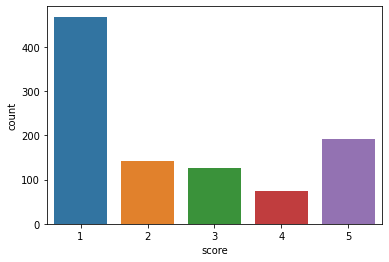

In [ ]:
#menampilkan grafik nilai dari variabel "label"
sns.countplot(x="score", data=df)

In [ ]:
#menghitung jumlah data masing-masing label
df["score"].value_counts()

1    468
5    191
2    142
3    125
4     74
Name: score, dtype: int64

### 2. Proses Preprocessing 

In [ ]:
def pelabelan(score):
  if score < 4:
    return 'NEGATIF'
  else:
    return 'POSITIF'
  
df['label'] = df['score'].apply(pelabelan)
df.head(5)

,at,score,content,label
201,2022-06-15 05:08:13,5,"Aplikasi sudah normal, semoga tidak terjadi ke...",POSITIF
315,2022-06-14 12:45:13,1,"Semakin diperbarui semakin lemot, berat, dikit...",NEGATIF
314,2022-06-14 12:30:03,1,"2 kali pembaharuan terakhir, di hp saya, oppo ...",NEGATIF
36,2022-06-14 12:19:40,3,Sy tidak bicara soal kemudahan berbelanjanya k...,NEGATIF
198,2022-06-14 10:02:02,1,Selamat tinggal Shopee. Aplikasi TERBURUK!! me...,NEGATIF


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import re
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from os import remove
def pre_process(text):
  text = text.lower() # Merubah format text menjadi format huruf kecil (lowercase)
  text = re.sub(r"\d+", "", text) # menghapus karakter angka
  text = text.translate(str.maketrans("","",string.punctuation))# menghapus karakter tanda baca
  TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" # menghapus karakter url dan simbol
  text = text.strip() # menghapus karakter kosong
  pisah = text.split() # memisahkan string kedalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya
  tokens = nltk.tokenize.word_tokenize(text) # menggunakan library NLTK untuk memisahkan kata dalam sebuah kalimat
  removed = []
  for t in tokens:
      removed.append(t)
  return text

df['content'] = df['content'].apply(lambda x:pre_process(x))
df.head()

,at,score,content,label
201,2022-06-15 05:08:13,5,aplikasi sudah normal semoga tidak terjadi kes...,POSITIF
315,2022-06-14 12:45:13,1,semakin diperbarui semakin lemot berat dikit b...,NEGATIF
314,2022-06-14 12:30:03,1,kali pembaharuan terakhir di hp saya oppo af a...,NEGATIF
36,2022-06-14 12:19:40,3,sy tidak bicara soal kemudahan berbelanjanya k...,NEGATIF
198,2022-06-14 10:02:02,1,selamat tinggal shopee aplikasi terburuk mendi...,NEGATIF


In [ ]:
from matplotlib import pyplot as plt

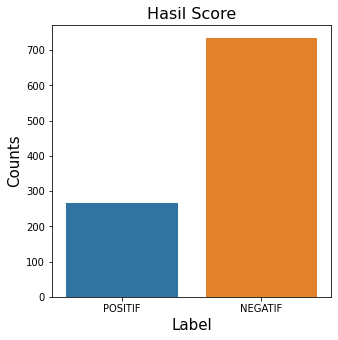

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=df)
plt.title('Hasil Score', fontsize=16)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Label', fontsize=15)
plt.xticks(rotation='horizontal');

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud 

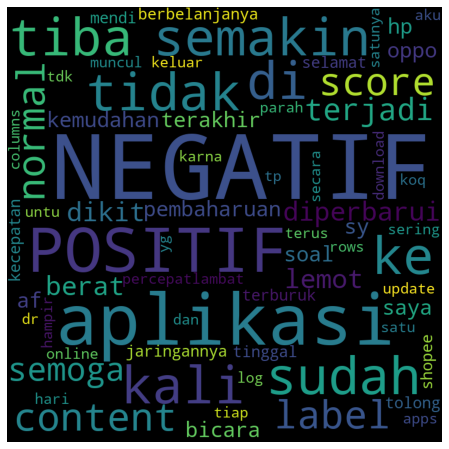

In [ ]:
# kata yang sering muncul (positif dan negatif)
wordcloud = WordCloud(width = 800, height= 800, background_color = 'black', max_words = 1000, min_font_size = 20).generate(str(df))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Simpan file sebagai CSV
df.to_csv("Hasil_Crawling.csv", index = False) 

### 3. Proses Modelling

In [ ]:
#melakukan pemodelan prediksi

%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss


#membangun vector space model
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(df.content)

#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)

#modeling sentiment
LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)



CPU times: user 310 ms, sys: 10.9 ms, total: 321 ms
Wall time: 370 ms


In [ ]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
print('F1 score : ', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print ('Log Loss : ', log_loss(y_test, yhat_prob))

F1 score :  0.4926107297702235
Log Loss :  1.184060218745649


### 4. Proses Evaluation Model Support Vector Machine(SVM)

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(df['content'])
x = cv.transform(df['content'])

y = df['label']

In [ ]:
# Build Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(x, y, train_size=0.80)

In [ ]:
# Find the best value of C in logistic regression
for c in [0.01, 0.05, 0.25, 0.5, 1]:

    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print('Accuracy for C-%s: %s' 
          % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C-0.01: 0.735
Accuracy for C-0.05: 0.815
Accuracy for C-0.25: 0.82
Accuracy for C-0.5: 0.815
Accuracy for C-1: 0.795


In [ ]:
final_model_sv = SVC(C=1)
final_model_sv.fit(x, y)
print('Final Model Accuracy: %s' %accuracy_score(y_test, final_model_sv.predict(X_test)))

Final Model Accuracy: 0.92


### 5. Proses Prediction

In [ ]:
import time

In [ ]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [ ]:
predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

SVM Training time: 0.324198s; Prediction time: 0.053876s


In [ ]:
#melakukan training
def training_step(df, vectorizer) :
    features = vectorizer.fit_transform(df.content)
    LR_ = LogisticRegression(C = 3, solver='liblinear', max_iter=150).fit(features,y)
    return LR_

#melakukan testing
classifier = training_step(df, vectorizer)
result = classifier.predict(vectorizer.transform(df.content))

In [ ]:
#simpan hasil
np.savetxt('/content/Hasil_Crawling.txt', result, fmt='%s', delimiter='\n')

In [ ]:
df_hasil = pd.read_csv(r'/content/Hasil_Crawling.txt')
df_hasil.head()

,NEGATIF
0,NEGATIF
1,NEGATIF
2,NEGATIF
3,NEGATIF
4,NEGATIF


In [ ]:
def prediksi_komentar(comment):
  result = classifier.predict(vectorizer.transform([comment]))
  if result == 1:
    return "negatif"
  else:
    return "positif"

In [ ]:
prediksi_komentar('aplikasi nya sangat bagus')

'positif'